In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

In [3]:



def add_derivatives(df, cols = ["x", "y"]):
    dt = (df["datetime"] - df["datetime"].shift()).median().delta*1e-9
    for col in cols:
        df = append_derivatives_to_dataframe(df, col, dt=dt, window_length=31, polyorder=3)
    return df

def read_txt(file):
    df = pd.read_csv(file, sep="\t", header=None)

    file_break_indexes = list(df[df[0]=="waveform"].index) + [df.index.max()]

    files = []
    for i in range(len(file_break_indexes) - 1):
        file = df.loc[file_break_indexes[i]:file_break_indexes[i+1]]
        file.columns = file.iloc[0]
        file = file.drop(file.index[0])
        file = file.iloc[:-1].dropna(how="all")
        files.append(file)
    return files

file = "amb_other/white_noise_fx_0RPM.txt"
files = read_txt(file)
file = "amb_other/white_noise_fy_0RPM.txt"
files.extend(read_txt(file))
print(len(files))

dfs = []
for df in files:    
    df = df.iloc[3:]
    old_cols = ["waveform", "Pos_Ax [um]", "Pos_Ay [um]", "Pos_Bx [um]", "Pos_By [um]", "F_Ax [N]",
                "F_Ay [N]", "F_Bx [N]", "F_By [N]", "Ex_Ax", "Ex_Ay", 'Ex_Bx', "Ex_By"]
    new_cols = ["datetime", "ax", "ay", "bx", "by", "f_ax", "f_ay", "f_bx", "f_by", "e_ax", "e_ay", "e_bx", "e_by"]
    df = df[old_cols]
    df.rename(columns = dict(zip(old_cols, new_cols)), inplace=True)
    df["datetime"] = df["datetime"].apply(pd.to_datetime)

    def to_float(x):
        if not isinstance(x, str):
            return x
        return float(x.replace(",", "."))

    for col in [ "ax", "ay", "bx", "by", "f_ax", "f_ay", "f_bx", "f_by", "e_ax", "e_ay", "e_bx", "e_by"]:
        df[col] = df[col].apply(to_float)

    df = df.drop(df[pd.isnull(df["datetime"])].index)
    
    dfs.append(df)

    



#dfs = list(map(add_derivatives, dfs))

2


In [4]:
dfs[0]

,datetime,ax,ay,bx,by,f_ax,f_ay,f_bx,f_by,e_ax,e_ay,e_bx,e_by
4,2019-03-24 00:52:37.747613,0.000011,-2.326942e-08,0.000028,-0.000005,0.200349,1.798521,1.521487,1.080327,0.739191,-0.000403,0.740477,0.002923
5,2019-03-24 00:52:37.747808,0.000011,-6.281798e-07,0.000028,-0.000005,0.205712,1.874862,1.587687,0.880086,0.867565,-0.000333,0.869193,0.002873
6,2019-03-24 00:52:37.748004,0.000011,1.775447e-07,0.000027,-0.000004,0.337555,1.793981,1.160036,1.126069,1.635707,-0.000351,1.637691,0.002784
7,2019-03-24 00:52:37.748199,0.000012,3.447028e-07,0.000026,-0.000004,0.005792,1.806582,1.765009,1.021920,0.823150,-0.000298,0.823783,0.002803
8,2019-03-24 00:52:37.748394,0.000012,1.644465e-08,0.000026,-0.000003,0.405790,1.335698,1.936250,0.744669,-0.392633,-0.000447,-0.392076,0.002892
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51207,2019-03-24 00:52:47.746636,-0.000020,6.965201e-07,-0.000013,0.000005,0.331193,2.171587,2.151456,0.476108,-0.716954,-0.000319,-0.718230,0.003150
51208,2019-03-24 00:52:47.746832,-0.000021,5.593435e-08,-0.000012,0.000006,0.461919,1.847324,2.095497,0.324432,-1.956600,-0.000377,-1.954577,0.003075
51209,2019-03-24 00:52:47.747027,-0.000020,1.062697e-06,-0.000012,0.000005,0.420814,1.887823,2.220820,0.962658,2.801431,-0.000425,2.804085,0.002900
51210,2019-03-24 00:52:47.747222,-0.000020,-2.753251e-08,-0.000012,0.000005,0.612340,2.429864,1.982806,0.609249,-1.735619,-0.000351,-1.737069,0.002958


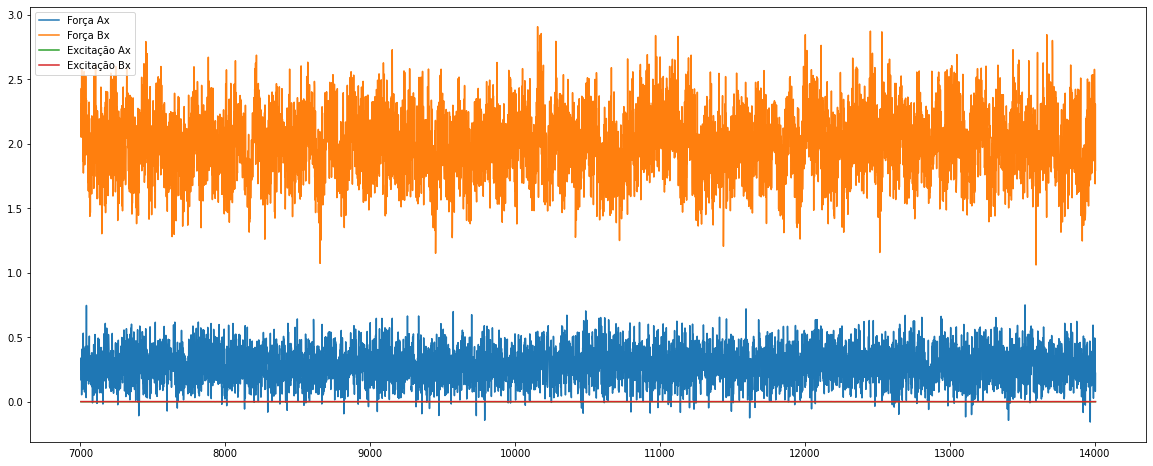

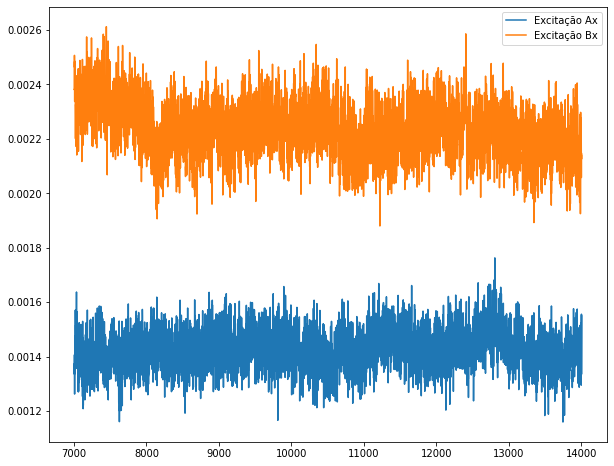

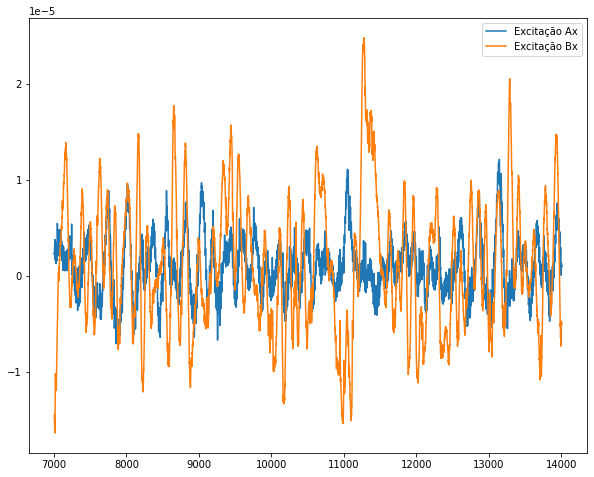

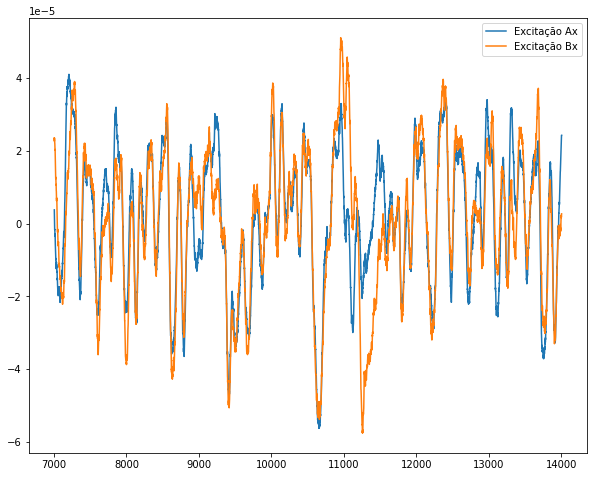

In [6]:
df = dfs[1]
i0 = 7000
i1 = i0 + 7000
plt.figure(figsize=(20,8))
plt.plot(df["f_ax"].iloc[i0:i1], label="Força Ax")
plt.plot(df["f_bx"].iloc[i0:i1], label="Força Bx")
plt.plot(df["e_ax"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["e_bx"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["e_ax"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["e_bx"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["ax"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["bx"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["ay"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["by"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

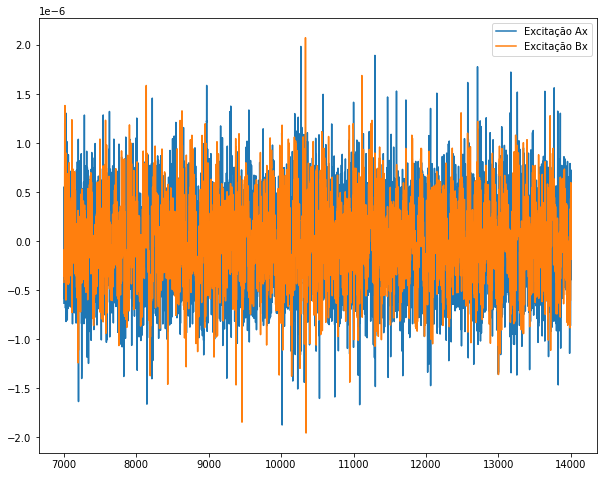

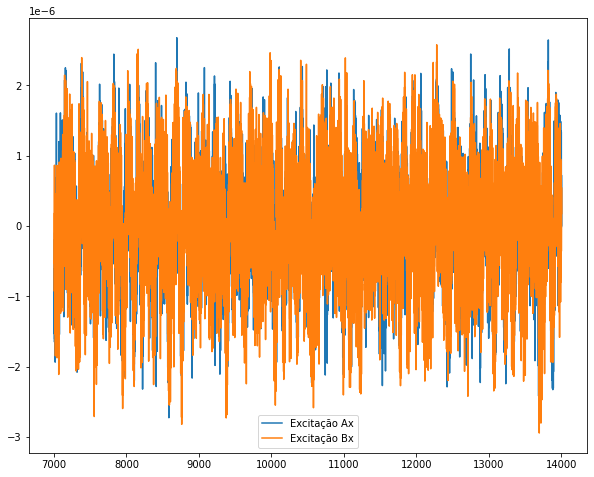

In [7]:
plt.figure(figsize=(10,8))
plt.plot((df["ax"] - df["ax"].shift()).iloc[i0:i1], label="Excitação Ax")
plt.plot((df["bx"] - df["bx"].shift()).iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot((df["ay"] - df["ay"].shift()).iloc[i0:i1], label="Excitação Ax")
plt.plot((df["by"] - df["by"].shift()).iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

In [8]:
if False:
    plt.figure(figsize=(10,8))
    plt.plot((df["ax"] - df["ax"].shift()).iloc[i0:i1]/0.000165, label="Excitação Ax")
    plt.plot(df["ax_dot"].iloc[i0:i1], label="Excitação Bx")
    plt.legend()
    plt.show()


    fig, ax1 = plt.subplots(figsize=(10,8))
    ax2 = ax1.twinx()
    ax1.plot(df["ax_dot"].iloc[i0:i1])
    ax2.plot(df["ax_dot2"].iloc[i0:i1], color="red")
    fig.show()

    fig, ax1 = plt.subplots(figsize=(10,8))
    ax2 = ax1.twinx()
    ax1.plot(df["bx_dot"].iloc[i0:i1])
    ax2.plot(df["bx_dot2"].iloc[i0:i1], color="red")
    fig.show()

    fig, ax1 = plt.subplots(figsize=(10,8))
    ax2 = ax1.twinx()
    ax1.plot(df["ay_dot"].iloc[i0:i1])
    ax2.plot(df["ay_dot2"].iloc[i0:i1], color="red")
    fig.show()

    fig, ax1 = plt.subplots(figsize=(10,8))
    ax2 = ax1.twinx()
    ax1.plot(df["by_dot"].iloc[i0:i1])
    ax2.plot(df["by_dot2"].iloc[i0:i1], color="red")
    fig.show()


In [10]:
df_train = pd.concat([dfs[0], dfs[1]], ignore_index=True)
#df_dev   = dfs[2]

def center_of_mass(df):
    df["f_ay"] -= df["f_ay"].mean()
    df["f_ax"] -= df["f_ax"].mean()
    df["f_bx"] -= df["f_bx"].mean()
    df["f_by"] -= df["f_by"].mean()
    df["x"] = (df["ax"] + df["bx"])/2
    #df["x"] = df["ax"]
    df["y"] = (df["ay"] + df["by"])/2
    #df["y"] = df["ay"]
    df['fx'] = df["f_ax"] + df["f_bx"]
    #df["fx"] = df["f_ax"]
    df['fy'] = df["f_ay"] + df["f_by"]
    return df

df_train = center_of_mass(df_train)
#df_dev = center_of_mass(df_dev)

factors = [0.1*i for i in range(10)]
dfs_factor = []
for factor in factors:
    print(factor)
    df2 = df_train.copy()
    for col in ["x", "y", "fx", "fy"]:
        df2[col] = df2[col]*factor
    dfs_factor.append(df2)

df_train = pd.concat([df_train] + dfs_factor, ignore_index=True)

df_train = add_derivatives(df_train)
#df_dev = add_derivatives(df_dev)

df_train.to_csv("amb_other/white_noise_train.csv", index=False)
#df_dev.to_csv("amb_other/sweep_test.csv", index=False)